Hovering Simulation

In [40]:
import sympy as sy
import numpy as np

In [41]:
#gravity
g = 9.81

#drone parameters
m = 0.851093668 #kg
l = 0.25 #m
kt = 0.0023918   #N/(rad/s)
#moments of inertia in 
Ixx = 0.00716 #kg*m^2
Iyy = 0.00716 #kg*m^2
Izz = 0.02521 #kg*m^2
Ir = 7.92337e-5 #kg*m^2

#efficiency
e = 34.0136 #W/N

#battery energy
E = 32.56*3600  #Watt hours to Joules

In [ ]:
Izz = 0.02521 #kg*m^2
Ir = 7.92337e-5 #kg*m^2

#efficiency
e = 34.0136 #W/N

#battery energy
E = 32.56*3600  #Watt hours to Joules

T = D

$k_t*(\omega_1^2+\omega_2^2+\omega_3^2+\omega_4^2) = mg$

all w's are the same for hover

$w_0 = \sqrt{(\frac{mg}{4k_t})}$

In [42]:
w0 = (np.sqrt(m*g/(4*kt)))

w1 = w0
w2 = w0
w3 = w0
w4 = w0

In [43]:
tf = 2*60

#time step
dt = 0.01

#initital conditions
w1 = w0
w2 = w0
w3 = w0
w4 = w0

time = 0

x = 0
y = 0
z = 1

dx = 0
dy = 0
dz = 0

theta = 0 #radian
phi = 0 #radian
psi = 0 #radian

dtheta = 0 #radian/s
dphi = 0 #radian/s
dpsi = 0 #radian/s


#setting lists to append data to with initial conditions
timecount = [time]
xcount = [x]
ycount = [y] 
zcount = [z]
phicount = [phi]
thetacount = [theta]
psicount = [psi]
energycount = [E/3600] #convert back to watt hours

while time <= tf:

    #translational EOM
    T = kt*(w1**2+w2**2+w3**2+w4**2) #thrust magnitude

    ddx = -T/m*(np.cos(phi)*np.sin(theta)*np.cos(psi)+np.sin(psi)*np.sin(phi))
    ddy = -T/m*(np.cos(phi)*np.sin(theta)*np.sin(psi)-np.sin(phi)*np.cos(psi))
    ddz = -T/m*np.cos(phi)*np.cos(theta)+g

    #Rotational EOM
    p = dphi - dpsi*np.sin(theta)
    q = dtheta * np.cos(phi) + dpsi*np.cos(theta)*np.sin(phi)
    r = -dtheta*np.sin(phi) + dpsi*np.cos(theta)*np.cos(phi)

    ddphi = (-Ir*q*(w1-w2+w3-w4)+Iyy*q*r-Izz*q*r-kt*l*(w2**2-w4**2))/Ixx
    ddtheta = (Ir*p*(w1-w2+w3-w4)-Ixx*p*r+Izz*p*r+kt*l*(w1**2-w3**2))/Iyy
    ddpsi = (Ixx*p*q-Izz*p*q+kt*(w1**2-w2**2+w3**2-w4**2))/Izz

    #change translational values based on EOM
    dx += ddx*dt
    x += dx*dt + 0.5*ddx*dt**2

    dy+= ddy*dt
    y += dy*dt + 0.5*ddy*dt**2
    
    dz += ddz*dt
    z += dz*dt + 0.5*ddz*dt**2

    #change rotational values based on EOM
    dphi += ddphi*dt
    phi += dphi*dt + 0.5*ddphi*dt**2
    
    dtheta += ddtheta*dt
    theta += dtheta*dt + 0.5*ddtheta*dt**2

    dpsi += ddpsi*dt
    psi += dpsi*dt + 0.5*ddpsi*dt**2

    #energy usage calcation
    E -= e*T*dt

    #increasing time step
    time += dt

    #add data to lists for graph
    if round(time, 2).is_integer():
        timecount.append(round(time, 1))
        zcount.append(z)
        ycount.append(y)
        xcount.append(x)
        phicount.append(phi)
        thetacount.append(theta)
        psicount.append(psi)
        energycount.append(E/3600) #convert back to watt hours

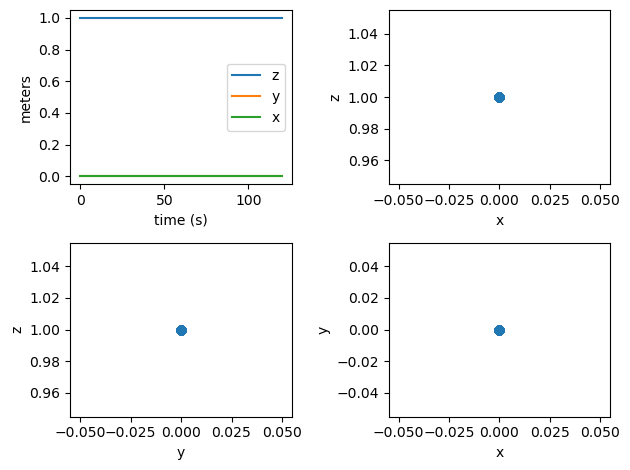

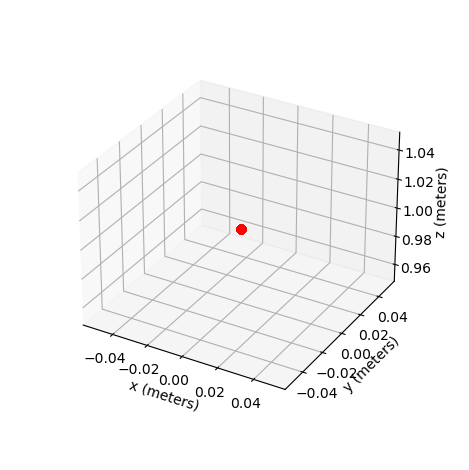

In [44]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, zcount, label='z')
ax1.plot(timecount, ycount, label='y')
ax1.plot(timecount, xcount, label='x')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(xcount, zcount, marker = 'o')
ax2.set_xlabel('x')
ax2.set_ylabel('z')


ax3 = plt.subplot2grid((2,2), (1,0))
ax3.plot(ycount, zcount, marker = 'o')
ax3.set_xlabel('y')
ax3.set_ylabel('z')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(xcount, ycount, marker = 'o')
ax4.set_xlabel('x')
ax4.set_ylabel('y')

plt.tight_layout()

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(xcount, ycount, zcount, 'red', marker = 'o')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_box_aspect(None, zoom=0.8)
fig. tight_layout()
plt.show()

(0.0, 33.56)

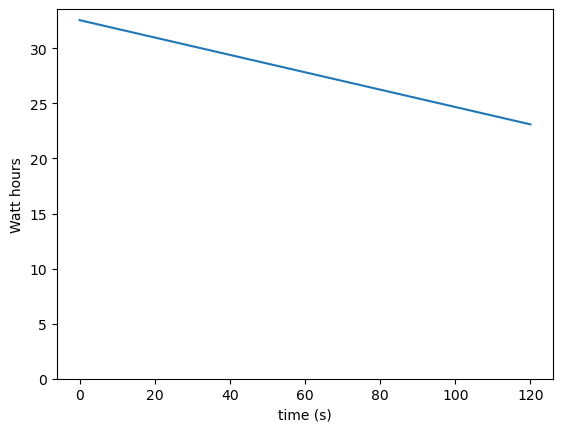

In [49]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((1,1), (0,0)) 
ax1.plot(timecount, energycount)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Watt hours')
ax1.set_ylim(0, energycount[0] + 1)